In [3]:
# Necessary imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [4]:
# Reading the input files
adjacency = pd.read_csv("/kaggle/input/da324dataminingproject2/adjacency.csv")
attributes = pd.read_excel("/kaggle/input/da324dataminingproject2/attributes.xlsx")
seed = pd.read_excel("/kaggle/input/da324dataminingproject2/seed.xlsx", header=None)

In [5]:
# Initializing PCA to convert 103D attribute vectors into 2D
pca = PCA(n_components=2)
pca_attributes = pca.fit_transform(attributes)

In [9]:
# Storing K-Means initializations using first row of seed
kmeans_seeds = []

for i in range(10):
    kmeans_seeds.append(pca_attributes[seed[0][i], :])
    
kmeans_seeds = np.array(kmeans_seeds)

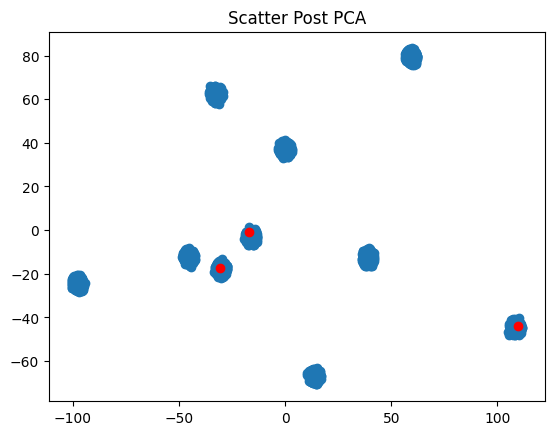

In [8]:
# Visualizing the attributes
plt.scatter(x=pca_attributes[:, 0], y=pca_attributes[:, 1])

for i in range(3):
    plt.plot(pca_attributes[seed[0][i], 0], pca_attributes[seed[0][i], 1], 'ro')

plt.title("Scatter Post PCA")
plt.savefig('scatter_pca.png')
plt.show()

In [10]:
# Running the K-Means clustering algorithm
kmeans = KMeans(n_clusters=10, init=kmeans_seeds, n_init=1)
kmeans.fit(pca_attributes)

KMeans(init=array([[-30.48072996, -17.53723473],
       [-16.8489675 ,  -0.66143161],
       [109.71505496, -44.19100835],
       [-97.78024421, -24.48679394],
       [ 60.16304557,  80.92130154],
       [ 41.57766175, -14.93164332],
       [ 13.97943215, -69.35502723],
       [-97.58613276, -21.7289264 ],
       [-46.18881345, -11.95095486],
       [-30.18656181,  61.40579929]]),
       n_clusters=10, n_init=1)

In [11]:
# Extracting the labels
labels = kmeans.labels_

In [141]:
# Storing the labels in a file for submission
df = pd.DataFrame({'LABEL':labels})
df['ID'] = df.index
df = df.set_index('ID').reset_index()
df.head()

,ID,LABEL
0,0,5
1,1,2
2,2,1
3,3,5
4,4,6


In [142]:
# Saving the submission file
df.to_csv('preds_kmeans.csv', index=False)